In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

matplotlib.style.use('ggplot') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
data = pd.read_csv('/home/jvdzwaan/data/dilipad/CHES/data/nl_ches_data.csv', index_col=0)
#data[['lrgen', 'lrecon']]

In [3]:
data.groupby('party').mean()['lrgen']

party
CD              9.375000
CDA             5.926428
ChristenUnie    5.995714
D66             4.620000
GPV             6.700000
GroenLinks      2.462857
LPF             8.375000
PVV             8.707693
PvdA            3.846786
PvdD            3.363636
RPF             6.800000
SGP             7.828571
SP              1.503214
VVD             7.396786
Name: lrgen, dtype: float64

In [4]:
from cptm.utils.experiment import load_opinions

config = {
    "inputData": "/path/to/input/data/*",
    "outDir": "/home/jvdzwaan/data/dilipad/results/all_years-adj-selected_parties_100/{}",
    "nTopics": 100
}

opinions = load_opinions(config)

In [5]:
# make matrix with opinions on rows and perspectives on columns
res = {}
for p, data in opinions.iteritems():
    #print p
    #print len(data.values.flatten())
    res[p] = data.values.flatten()
pca_data = pd.DataFrame(res).T
pca_data

,0,1,2,3,4,5,6,7,8,9,...,624490,624491,624492,624493,624494,624495,624496,624497,624498,624499
CDA,0.000048,0.000006,0.000009,0.000008,0.000010,0.000009,0.000008,0.000007,0.000011,0.000010,...,0.000238,0.000052,0.000011,0.000152,0.000010,0.002575,0.000089,0.000005,0.000007,0.000010
ChristenUnie,0.000021,0.000023,0.000027,0.000021,0.000027,0.000012,0.000028,0.000014,0.000025,0.000018,...,0.000013,0.000670,0.001270,0.000017,0.000293,0.000225,0.000017,0.000166,0.000015,0.000029
D66,0.000015,0.000016,0.000017,0.000010,0.000015,0.000012,0.000017,0.000011,0.000018,0.000014,...,0.000013,0.000078,0.000016,0.000014,0.000017,0.000009,0.000010,0.000009,0.000018,0.000014
GroenLinks,0.000156,0.000014,0.000015,0.000010,0.000010,0.000009,0.000015,0.000005,0.000012,0.000012,...,0.000009,0.000009,0.000017,0.000008,0.000015,0.004554,0.000006,0.000007,0.000013,0.000011
LPF,0.000074,0.000096,0.000074,0.000047,0.000051,0.000035,0.000073,0.000042,0.000074,0.000087,...,0.000084,0.000070,0.000080,0.009844,0.000104,0.000086,0.000043,0.000043,0.000533,0.000036
PVV,0.000385,0.000044,0.000038,0.000034,0.000049,0.000010,0.000039,0.000012,0.000034,0.000046,...,0.000049,0.000221,0.000055,0.000023,0.000035,0.002611,0.000022,0.000021,0.000046,0.000040
PvdA,0.000009,0.000007,0.000008,0.000006,0.000008,0.000009,0.000007,0.000006,0.000009,0.000010,...,0.000036,0.000041,0.000012,0.000006,0.000009,0.000007,0.000005,0.000006,0.000087,0.000008
PvdD,0.000085,0.000076,0.000092,0.000097,0.000121,0.000044,0.000121,0.000053,0.000079,0.000066,...,0.000087,0.000088,0.000131,0.000097,0.000109,0.000071,0.000101,0.000059,0.000009,0.000069
SGP,0.000024,0.000020,0.000028,0.000018,0.000035,0.000014,0.000024,0.000018,0.000028,0.000018,...,0.000242,0.000020,0.000042,0.000027,0.000026,0.000155,0.001630,0.000086,0.000021,0.000673
SP,0.000012,0.000013,0.000013,0.000013,0.000013,0.000013,0.000011,0.000006,0.000014,0.000015,...,0.000011,0.000011,0.000012,0.000009,0.000010,0.000014,0.000010,0.000007,0.000010,0.000063


In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(pca_data)
print(pca.explained_variance_ratio_) 

[ 0.17634843  0.12668456  0.10737853  0.09884479  0.09554046  0.08899172
  0.08645505  0.08193006  0.07188432  0.06594209]


In [7]:
pca = PCA(n_components=2)
res = pca.fit_transform(pca_data)
print(pca.explained_variance_ratio_) 
print res

[ 0.17634843  0.12668456]
[[-0.25122062  0.00320607]
 [-0.07552158  0.29022687]
 [-0.1356258  -0.00283896]
 [-0.21719559 -0.04005302]
 [ 0.45963535  0.11180558]
 [ 0.30066303 -0.68778483]
 [-0.27113445 -0.04366487]
 [ 0.67225634  0.20199869]
 [-0.05176282  0.35567302]
 [-0.19905397 -0.11720961]
 [-0.23103989 -0.07135895]]


In [8]:
ranking = pd.DataFrame(res, index=pca_data.index, columns=['pca1', 'pca2'])
ranking.sort_values(by='pca2')

,pca1,pca2
PVV,0.300663,-0.687785
SP,-0.199054,-0.117210
VVD,-0.231040,-0.071359
PvdA,-0.271134,-0.043665
GroenLinks,-0.217196,-0.040053
D66,-0.135626,-0.002839
CDA,-0.251221,0.003206
LPF,0.459635,0.111806
PvdD,0.672256,0.201999
ChristenUnie,-0.075522,0.290227


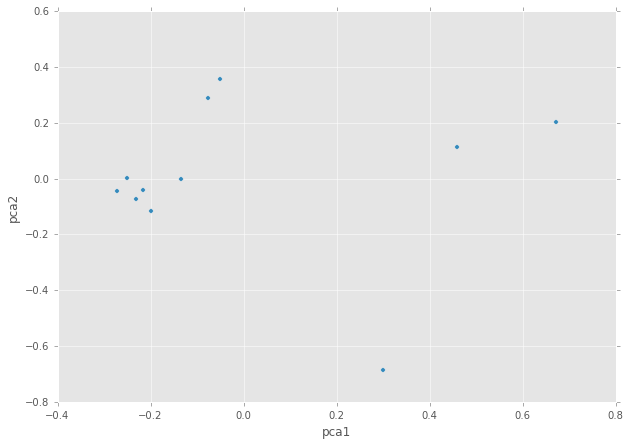

In [9]:
fig, ax = plt.subplots()
ranking.plot('pca1', 'pca2', kind='scatter', ax=ax)

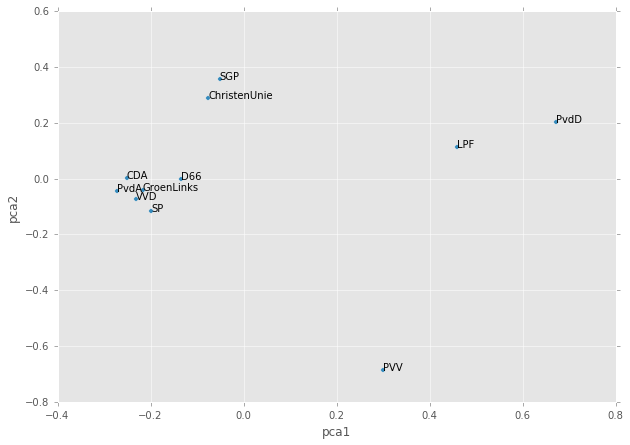

In [10]:
fig, ax = plt.subplots()
ranking.plot('pca1', 'pca2', kind='scatter', ax=ax)

for k, v in ranking.iterrows():
    ax.annotate(k, v)

In [11]:
pca = PCA(n_components=3)
res = pca.fit_transform(pca_data)
#print(pca.explained_variance_ratio_) 
#print res

In [12]:
ranking = pd.DataFrame(res, index=pca_data.index, columns=['pca1', 'pca2', 'pca3'])
ranking.sort_values(by='pca1')

,pca1,pca2,pca3
PvdA,-0.271134,-0.043665,0.060570
CDA,-0.251221,0.003206,-0.224793
VVD,-0.231040,-0.071359,-0.207753
GroenLinks,-0.217196,-0.040053,0.342571
SP,-0.199054,-0.117210,0.352814
D66,-0.135626,-0.002839,0.193404
ChristenUnie,-0.075522,0.290227,-0.069742
SGP,-0.051763,0.355673,-0.381667
PVV,0.300663,-0.687785,-0.232462
LPF,0.459635,0.111806,-0.072332


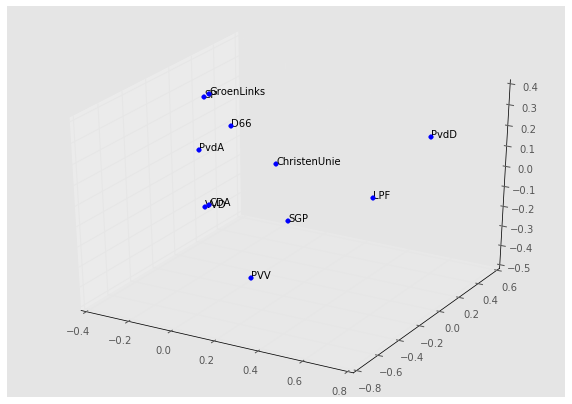

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(ranking['pca1'], ranking['pca2'], ranking['pca3'], c='red', marker='o')

for i in range(len(ranking['pca1'])): #plot each point + it's index as text above
 ax.scatter(ranking['pca1'][i], ranking['pca2'][i], ranking['pca3'][i], color='b') 
 ax.text(ranking['pca1'][i], ranking['pca2'][i], ranking['pca3'][i],  '%s' % (ranking.index[i]), size=10, zorder=1,  
 color='k') 
#for k in ranking.iterrows():
#    ax.annotate(k[0], k[1:])
#    print k

In [14]:
from scipy.stats import kendalltau

ches_data = pd.read_csv('/home/jvdzwaan/data/dilipad/CHES/data/nl_ches_data.csv', index_col=0)

ches_lrgen = list(ches_data.groupby('party').mean()['lrgen'].copy().sort_values().index)
ches_lrecon = list(ches_data.groupby('party').mean()['lrecon'].copy().sort_values().index)

# rank correlation between lrgen en lrecon
print kendalltau(ches_lrgen, ches_lrecon)


KendalltauResult(correlation=0.62637362637362659, pvalue=0.001805696441648204)


In [15]:
# calculate kendall's tau between pca rankings and ches ranking
from scipy.stats import kendalltau

n = 10

pca = PCA(n_components=n)
res = pca.fit_transform(pca_data)
print(pca.explained_variance_ratio_)

ranking = pd.DataFrame(res, index=pca_data.index, columns=['pca{}'.format(i) for i in range(n)])
#print ranking['pca2'].copy().sort_values().index

ches_lrgen = [p for p in ches_lrgen if p in ranking.index]
ches_lrecon = [p for p in ches_lrecon if p in ranking.index]

print 'lrgen', ches_lrgen
print 'lrecon', ches_lrecon

print kendalltau(ches_lrgen, ches_lrecon)

r = {}

for i in range(n):
    #print 'pca component', i
    
    for m in ['lrgen', 'lrecon']:
        #print m
        if m == 'lrgen':
            ches_r = ches_lrgen
        else:
            ches_r = ches_lrecon
        
        if not i in r.keys():
            r[i] = []
    
        pca_ranking = ranking['pca{}'.format(i)].copy().sort_values().index
        #print list(pca_ranking)
    
        c, p = kendalltau(ches_r, list(pca_ranking))
        if p < 0.05:
            #r[i].append(c)
            r[i].append(str(c)+' sign')
            #print ches_r
            #print list(pca_ranking)
        else:
            #r[i].append('n.s.')
            r[i].append(c)
        
        # revers
        c, p = kendalltau(ches_r[::-1], list(pca_ranking))
        if p < 0.05:
            r[i].append(c)
            #print ches_r
            #print list(pca_ranking)
        else:
            #r[i].append('n.s.')
            r[i].append(c)
for i in r.keys():
    r[i].append(pca.explained_variance_ratio_[i])

table = pd.DataFrame(r, index=['lrgen', 'lrgen-reverse', 'lrecon', 'lrecon-reverse', 'PCA'])
#print np.round(table[[0, 1, 2, 3, 4]], 3).to_latex()
table[[0, 1, 2, 3, 4]]

[ 0.17634843  0.12668456  0.10737853  0.09884479  0.09554046  0.08899172
  0.08645505  0.08193006  0.07188432  0.06594209]
lrgen ['SP', 'GroenLinks', 'PvdD', 'PvdA', 'D66', 'CDA', 'ChristenUnie', 'VVD', 'SGP', 'LPF', 'PVV']
lrecon ['SP', 'GroenLinks', 'PvdD', 'PvdA', 'ChristenUnie', 'D66', 'CDA', 'PVV', 'SGP', 'VVD', 'LPF']
KendalltauResult(correlation=0.56363636363636349, pvalue=0.015806777392301848)


,0,1,2,3,4
lrgen,0.381818,0.236364,0.127273,-0.272727,0.127273
lrgen-reverse,0.200000,0.490909,0.381818,0.0545455,0.018182
lrecon,0.163636,0.163636,0.054545,-0.636363636364 sign,-0.090909
lrecon-reverse,0.127273,0.709091,0.090909,-0.0181818,0.018182
PCA,0.176348,0.126685,0.107379,0.0988448,0.095540


In [16]:
from scipy.stats import spearmanr

parties = ['SP', 'GroenLinks', 'PvdD', 'PvdA', 'D66', 'CDA', 'ChristenUnie', 'VVD', 'SGP', 'LPF', 'PVV']

print ranking.index
lrgen = ches_data.groupby('party').mean()['lrgen'].copy().loc[parties].sort_values()
lrgen_r = ches_data.groupby('party').mean()['lrgen'].copy().loc[parties].sort_values(ascending=False)
lrecon = ches_data.groupby('party').mean()['lrecon'].copy().loc[parties].sort_values()
lrecon_r = ches_data.groupby('party').mean()['lrecon'].copy().loc[parties].sort_values(ascending=False)

print spearmanr(lrgen.values, lrecon.values)
print spearmanr(lrgen.values, lrecon.values[::-1])

n = 10

pca = PCA(n_components=n)
res = pca.fit_transform(pca_data)
print(pca.explained_variance_ratio_)

ranking = pd.DataFrame(res, index=pca_data.index, columns=['pca{}'.format(i) for i in range(n)])

print spearmanr(lrgen.values, ranking['pca1'].loc[lrgen.index].values)
print spearmanr(lrgen_r.values, ranking['pca1'].loc[lrgen_r.index].values)

print lrgen

r = {}

for i in range(n):
    #print 'pca component', i
    
    for m in ['lrgen', 'lrecon']:
        #print m
        if m == 'lrgen':
            ches_r = lrgen
            ches_r_r = lrgen_r
        else:
            ches_r = lrecon
            ches_r_r = lrecon_r
        
        if not i in r.keys():
            r[i] = []
        
        c, p = spearmanr(ches_r.values, ranking['pca{}'.format(i)].loc[ches_r.index].values)
        #print ches_r
        #print ranking['pca{}'.format(i)].loc[ches_r.index]
        if p < 0.05:
            #r[i].append(c)
            r[i].append(str(c)+' sign')
            #print ches_r
            #print list(pca_ranking)
        else:
            #r[i].append('n.s.')
            r[i].append(c)

#pd.DataFrame(r)
table = pd.DataFrame(r, index=['lrgen', 'lrecon'])
#print np.round(table[[0, 1, 2, 3, 4]], 3).to_latex()
table

Index([u'CDA', u'ChristenUnie', u'D66', u'GroenLinks', u'LPF', u'PVV', u'PvdA',
       u'PvdD', u'SGP', u'SP', u'VVD'],
      dtype='object')
SpearmanrResult(correlation=1.0, pvalue=0.0)
SpearmanrResult(correlation=-1.0, pvalue=0.0)
[ 0.17634843  0.12668456  0.10737853  0.09884479  0.09554046  0.08899172
  0.08645505  0.08193006  0.07188432  0.06594209]
SpearmanrResult(correlation=0.13636363636363635, pvalue=0.6893090205863619)
SpearmanrResult(correlation=0.13636363636363635, pvalue=0.6893090205863619)
party
SP              1.503214
GroenLinks      2.462857
PvdD            3.363636
PvdA            3.846786
D66             4.620000
CDA             5.926428
ChristenUnie    5.995714
VVD             7.396786
SGP             7.828571
LPF             8.375000
PVV             8.707693
Name: lrgen, dtype: float64


,0,1,2,3,4,5,6,7,8,9
lrgen,0.363636,0.136364,-0.881818181818 sign,0.054545,0.163636,0.100000,-0.045455,0.154545,-0.009091,-0.254545
lrecon,0.209091,0.172727,-0.827272727273 sign,0.427273,0.200000,0.209091,-0.063636,0.118182,0.009091,-0.181818


In [17]:
ches_r[::-1]

party
LPF             8.110000
VVD             7.893929
SGP             6.766667
PVV             6.760385
CDA             5.895000
D66             5.182500
ChristenUnie    4.820000
PvdA            3.827857
PvdD            3.555555
GroenLinks      2.322500
SP              1.072500
Name: lrecon, dtype: float64

In [18]:
ches_lrgen = list(ches_data.groupby('party').mean()['lrgen'].copy().sort_values().index)
ches_lrecon = list(ches_data.groupby('party').mean()['lrecon'].copy().sort_values().index)
print kendalltau(ches_lrgen, ches_lrecon)

KendalltauResult(correlation=0.62637362637362659, pvalue=0.001805696441648204)


In [19]:
print kendalltau(ches_r, ches_r[::-1])

KendalltauResult(correlation=-0.99999999999999978, pvalue=1.8543417648443592e-05)


## Parties data - Topics divided in CAP categories

In [20]:
topic_coherence = pd.read_csv(config.get('outDir').format('topic_coherence_100.csv'), index_col=0, encoding='utf-8')
topic2cap = dict(topic_coherence['cap_svm'])
print topic2cap

{0: 1, 1: 5, 2: 3, 3: 12, 4: 5, 5: 2, 6: 15, 7: 19, 8: 15, 9: 6, 10: 19, 11: 16, 12: 19, 13: 20, 14: 16, 15: 12, 16: 16, 17: 16, 18: 3, 19: 16, 20: 5, 21: 20, 22: 2, 23: 1, 24: 19, 25: 12, 26: 15, 27: 20, 28: 19, 29: 5, 30: 2, 31: 15, 32: 20, 33: 12, 34: 2, 35: 3, 36: 10, 37: 19, 38: 6, 39: 19, 40: 2, 41: 3, 42: 15, 43: 17, 44: 15, 45: 3, 46: 14, 47: 2, 48: 12, 49: 20, 50: 17, 51: 20, 52: 3, 53: 5, 54: 14, 55: 7, 56: 10, 57: 14, 58: 20, 59: 19, 60: 12, 61: 10, 62: 6, 63: 1, 64: 3, 65: 6, 66: 12, 67: 21, 68: 5, 69: 3, 70: 19, 71: 21, 72: 2, 73: 13, 74: 6, 75: 16, 76: 3, 77: 8, 78: 7, 79: 4, 80: 15, 81: 19, 82: 13, 83: 2, 84: 13, 85: 6, 86: 14, 87: 3, 88: 10, 89: 6, 90: 15, 91: 19, 92: 6, 93: 15, 94: 17, 95: 19, 96: 1, 97: 19, 98: 4, 99: 5}


In [21]:
cap2topic = {}
for t, c in topic2cap.iteritems():
    if c not in cap2topic.keys():
        cap2topic[c] = []
    cap2topic[c].append(t)
print cap2topic

{1: [0, 23, 63, 96], 2: [5, 22, 30, 34, 40, 47, 72, 83], 3: [2, 18, 35, 41, 45, 52, 64, 69, 76, 87], 4: [79, 98], 5: [1, 4, 20, 29, 53, 68, 99], 6: [9, 38, 62, 65, 74, 85, 89, 92], 7: [55, 78], 8: [77], 10: [36, 56, 61, 88], 12: [3, 15, 25, 33, 48, 60, 66], 13: [73, 82, 84], 14: [46, 54, 57, 86], 15: [6, 8, 26, 31, 42, 44, 80, 90, 93], 16: [11, 14, 16, 17, 19, 75], 17: [43, 50, 94], 19: [7, 10, 12, 24, 28, 37, 39, 59, 70, 81, 91, 95, 97], 20: [13, 21, 27, 32, 49, 51, 58], 21: [67, 71]}


In [22]:
from cptm.experiment_com_pca_ches import do_kendallt, do_spearmanr

lrgen = ches_data.groupby('party').mean()['lrgen'].copy().loc[parties].sort_values()
lrecon = ches_data.groupby('party').mean()['lrecon'].copy().loc[parties].sort_values()

#print lrgen
#print lrecon

# make matrix with opinions on rows and perspectives on columns
n=10

r = {}
column_names = []

first = True

for cap, tps in cap2topic.iteritems():
    print 'CAP', cap
    
    res = {}
    for p in opinions.keys():
        res[p] =[]
    
    for t in tps:
        for p, data in opinions.iteritems():
            res[p] = np.concatenate((res[p], data[str(t)].values), axis=0)
    pca_data = pd.DataFrame(res).T
    #print pca_data
    pca = PCA(n_components=n)
    pca_result = pca.fit_transform(pca_data)
    print(pca.explained_variance_ratio_)
    ranking = pd.DataFrame(pca_result, index=pca_data.index, columns=['pca{}'.format(i) for i in range(n)])
    #print ranking
    for i in range(n):
        #print 'pca component', i
    
        for m in ['lrgen', 'lrecon']:
            #print m
            if m == 'lrgen':
                ches_r = lrgen
            else:
                ches_r = lrecon
            
            if cap not in r.keys():
                r[cap] = []
            
            pca_ranking = ranking['pca{}'.format(i)].copy().sort_values().index
            #print pca_ranking
            #print ches_r
            
            #print list(ches_r.index)
            #print list(pca_ranking)
            r[cap].append(do_kendallt(list(ches_r.index), list(pca_ranking)))
            r[cap].append(do_kendallt(list(ches_r[::-1].index), list(pca_ranking)))
            r[cap].append(do_spearmanr(ches_r.values, ranking['pca{}'.format(i)].loc[ches_r.index].values))
            
            if first:
                column_name_prefix = 'pca{}_{}'.format(i, m)
                column_names.append('{}_{}'.format(column_name_prefix, 'kendalltau'))
                column_names.append('{}_{}_{}'.format(column_name_prefix, 'kendalltau', 'R'))
                column_names.append('{}_{}'.format(column_name_prefix, 'spearmanr'))
    first = False

results = pd.DataFrame(r, index=column_names)
results = results.T
results

CAP 1
[ 0.2637088   0.13247962  0.11333107  0.09337932  0.08546265  0.07624616
  0.07264951  0.06001186  0.05475711  0.0479739 ]
CAP 2
[ 0.19373402  0.16467987  0.10848484  0.0977707   0.09390878  0.07973231
  0.07464122  0.07114531  0.06217515  0.0537278 ]
CAP 3
[ 0.17934342  0.14834991  0.10839239  0.10297566  0.09469465  0.08369455
  0.07522902  0.0731325   0.07024248  0.06394543]
CAP 4
[ 0.19002906  0.18149833  0.1200473   0.10713597  0.08926721  0.08038612
  0.06494506  0.06097179  0.05779666  0.0479225 ]
CAP 5
[ 0.15748314  0.13972067  0.12069656  0.10480659  0.09706006  0.09021132
  0.08450522  0.07251455  0.07140907  0.06159283]
CAP 6
[ 0.19016677  0.1094541   0.1082191   0.09878228  0.09021525  0.08928452
  0.08591539  0.08262426  0.07455554  0.07078278]
CAP 7
[ 0.25374059  0.14939417  0.10552865  0.09960105  0.08805404  0.08476687
  0.06751846  0.05649517  0.04877747  0.04612352]
CAP 8
[ 0.30942139  0.17060655  0.1226162   0.09519676  0.06666489  0.06209809
  0.05177826  0.04

,pca0_lrgen_kendalltau,pca0_lrgen_kendalltau_R,pca0_lrgen_spearmanr,pca0_lrecon_kendalltau,pca0_lrecon_kendalltau_R,pca0_lrecon_spearmanr,pca1_lrgen_kendalltau,pca1_lrgen_kendalltau_R,pca1_lrgen_spearmanr,pca1_lrecon_kendalltau,...,pca8_lrgen_spearmanr,pca8_lrecon_kendalltau,pca8_lrecon_kendalltau_R,pca8_lrecon_spearmanr,pca9_lrgen_kendalltau,pca9_lrgen_kendalltau_R,pca9_lrgen_spearmanr,pca9_lrecon_kendalltau,pca9_lrecon_kendalltau_R,pca9_lrecon_spearmanr
1,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
2,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,-0.563636,-0.672727,n.s.,n.s.,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
3,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
4,n.s.,n.s.,-0.772727,n.s.,n.s.,-0.772727,n.s.,n.s.,n.s.,n.s.,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
5,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,0.718182,n.s.,n.s.,0.672727
6,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
7,n.s.,-0.563636,n.s.,n.s.,-0.490909,n.s.,-0.490909,n.s.,n.s.,-0.490909,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
8,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,...,0.654545,n.s.,n.s.,0.709091,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
10,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,-0.563636,n.s.,n.s.,n.s.,...,n.s.,n.s.,-0.672727,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
12,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,...,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.


In [23]:
results[[l for l in results.columns if l.startswith('pca1')]]

,pca1_lrgen_kendalltau,pca1_lrgen_kendalltau_R,pca1_lrgen_spearmanr,pca1_lrecon_kendalltau,pca1_lrecon_kendalltau_R,pca1_lrecon_spearmanr
1,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
2,-0.563636,-0.672727,n.s.,n.s.,n.s.,n.s.
3,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
4,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
5,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
6,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
7,-0.490909,n.s.,n.s.,-0.490909,n.s.,n.s.
8,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.
10,-0.563636,n.s.,n.s.,n.s.,n.s.,n.s.
12,n.s.,n.s.,n.s.,n.s.,n.s.,n.s.


In [24]:
print results[[l for l in results.columns if l.startswith('pca1')]].to_latex()

\begin{tabular}{lllllll}
\toprule
{} & pca1\_lrgen\_kendalltau & pca1\_lrgen\_kendalltau\_R & pca1\_lrgen\_spearmanr & pca1\_lrecon\_kendalltau & pca1\_lrecon\_kendalltau\_R & pca1\_lrecon\_spearmanr \\
\midrule
1  &                  n.s. &                    n.s. &                 n.s. &                   n.s. &                     n.s. &                  n.s. \\
2  &             -0.563636 &               -0.672727 &                 n.s. &                   n.s. &                     n.s. &                  n.s. \\
3  &                  n.s. &                    n.s. &                 n.s. &                   n.s. &                     n.s. &                  n.s. \\
4  &                  n.s. &                    n.s. &                 n.s. &                   n.s. &                     n.s. &                  n.s. \\
5  &                  n.s. &                    n.s. &                 n.s. &                   n.s. &                     n.s. &                  n.s. \\
6  &         

In [25]:
n=10
pca = PCA(n_components=n)
res = pca.fit_transform(pca_data)
print(pca.explained_variance_ratio_)

[ 0.22026584  0.14207161  0.11454441  0.10869256  0.08778764  0.07974677
  0.07003552  0.063822    0.0603313   0.05270235]
